In [10]:
import matplotlib.pyplot as plt
from data_processing.evaluate_fit import evaluate_fit


def plot_fit(df_fit, df_raw, title, save_fig):
    filename = title.replace(' ', '_') + '.png'
    
    r2_overall , r2_dict, rmse_overall, rmse_dict = evaluate_fit(df_fit, df_raw)
    title += f' Overall rmse = {rmse_overall}, Overall r2 = {r2_overall}'
    
    fig, _ = plt.subplots(3,3,figsize=(17,17))
    plt.suptitle(title ,fontsize=20)

    
    for comp in range(1, 8):
        plt.subplot(3, 3, comp)
        
        raw = df_raw.loc[comp]
        raw.reset_index(drop=False, inplace=True)
        
        fit = df_fit.loc[comp]
        fit.reset_index(drop=False, inplace=True)
        fit.time += 1
        
        frame = '33'+str(comp)
        plt.subplot(frame)
        
        title = f'Comp {comp} rmse = {rmse_dict[comp]}, r2 = {r2_dict[comp]}' 
        plt.title(title,fontsize=15)
        plt.xlabel('Time (Days)', fontsize = 12)
        plt.ylabel('g/L or mM', fontsize = 12)
        l1 = plt.scatter(x=raw['time'], y=raw['acetate'], color='tab:orange')
        l2 = plt.scatter(x=raw['time'], y=raw['biomass'], color='tab:blue')
        l3 = plt.scatter(x=raw['time'], y=raw['butanol'], color='tab:purple')
        l4 = plt.scatter(x=raw['time'], y=raw['butyrate'], color='tab:red')
        l5 = plt.scatter(x=raw['time'], y=raw['ethanol'], color='tab:green')
        
        plt.plot(fit['time'], fit['acetate'], color='tab:orange')
        plt.plot(fit['time'], fit['biomass'], color='tab:blue')
        plt.plot(fit['time'], fit['butanol'], color='tab:purple')
        plt.plot(fit['time'], fit['butyrate'], color='tab:red')
        plt.plot(fit['time'], fit['ethanol'], color='tab:green')
        
    series_labels = ['acetate', 'biomass', 'butanol', 'butyrate', 'ethanol']
    fig.legend(handles=[l1, l2, l3, l4, l5], labels = series_labels, loc='lower center', ncol=5)

    if save_fig:
        plt.savefig(filename, dpi=150)
    

In [2]:
import pandas as pd
import os
cur_dir = os.getcwd()

In [3]:
raw_data = pd.read_csv(f'{cur_dir}\\data\\raw_data.csv')
raw_data.set_index(['composition','trial','time'],drop=True,inplace=True)

smooth_data = pd.read_csv(f'{cur_dir}\\data\\smooth_data.csv')
smooth_data.set_index(['composition','trial','time'],drop=True,inplace=True)

kinetic_data = pd.read_csv(f'{cur_dir}\\data\\kinetic_data.csv')
kinetic_data.set_index(['composition', 'time'],drop=True,inplace=True)

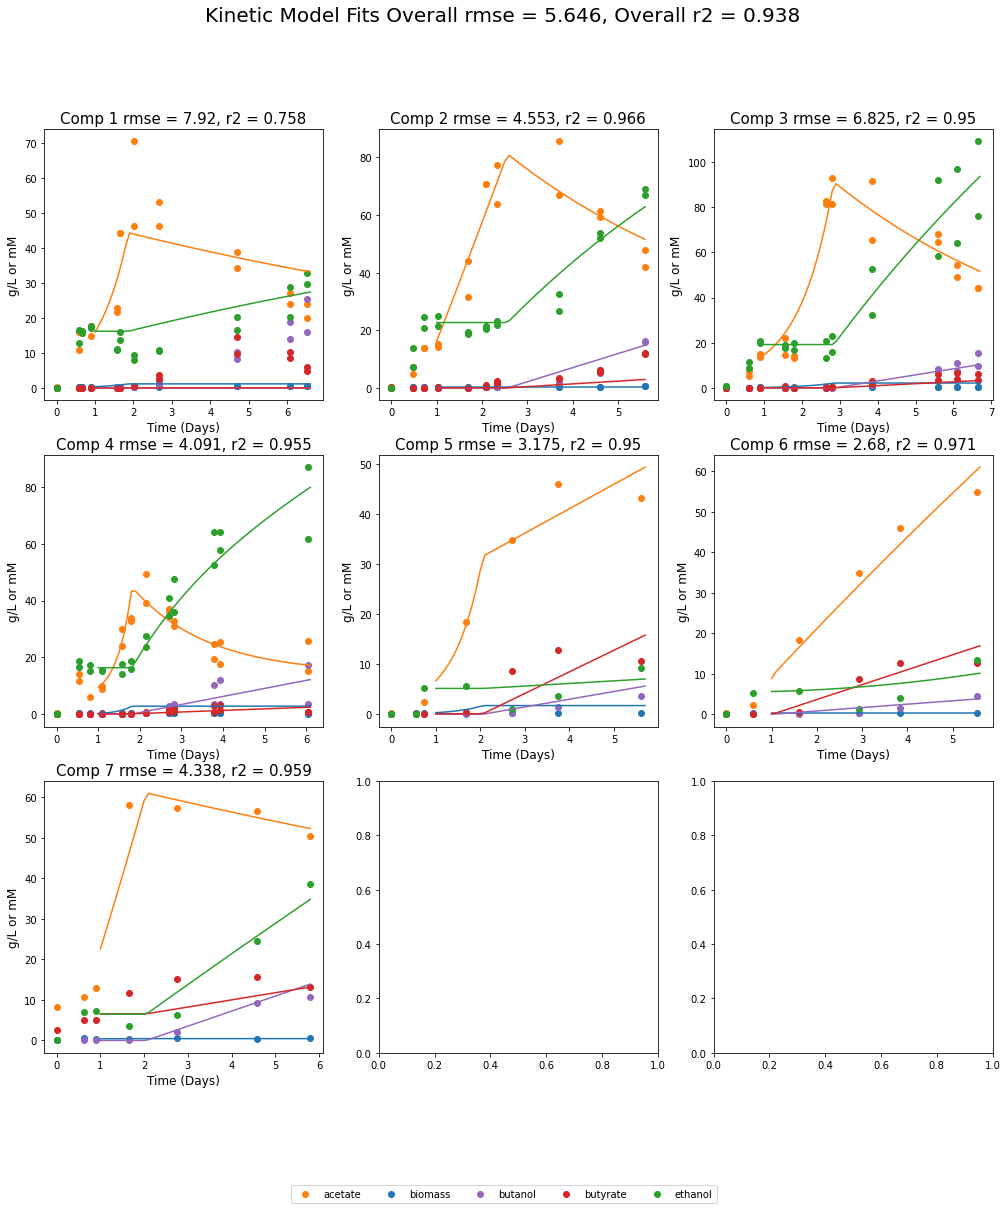

In [11]:
# from plotting.plot_fit import plot_fit
plot_fit(kinetic_data, raw_data, 'Kinetic Model Fits', True)